# Objectifs
- Verifier la distribution des données  : 
    - de la target qui sont la proportions d'amyloses

- identifier les outliers et les supprimer de notre database
    - vu qu'on utilise des données spectrales on va utiliser une ACP pour reduire la dimension

In [126]:
import this 

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from chemotools.scatter import StandardNormalVariate
import sys
sys.path.append('/Users/douati/Documents/GitHub/Spectroscopy-project-')
from module_projet.pca_plot import plot_pca_variance,plot_pca_score

In [128]:
# chargement des données
with open("../../data/processed/mmc3.pkl", "rb") as f:
    Xtrain, ytrain, Xtest, ytest, X, wavelengths = pickle.load(f)

# distribution de  l'amylose

## Repartition de la réponse lors de l'entrainement

Text(0.5, 1.0, 'Distribution de la réponse en entraînement')

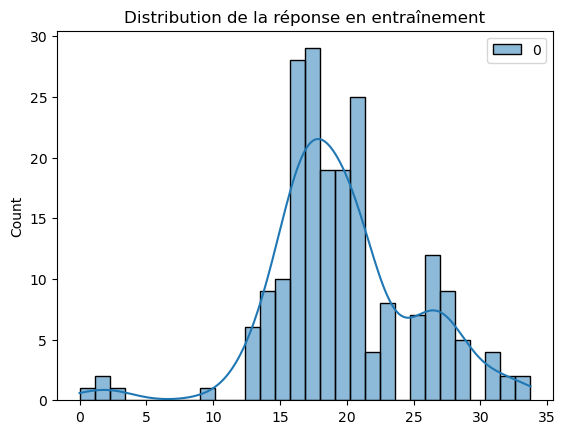

In [129]:
sns.histplot(ytrain, bins=30, kde=True)
plt.title("Distribution de la réponse en entraînement")

Text(0.5, 1.0, 'Distribution de la réponse en test')

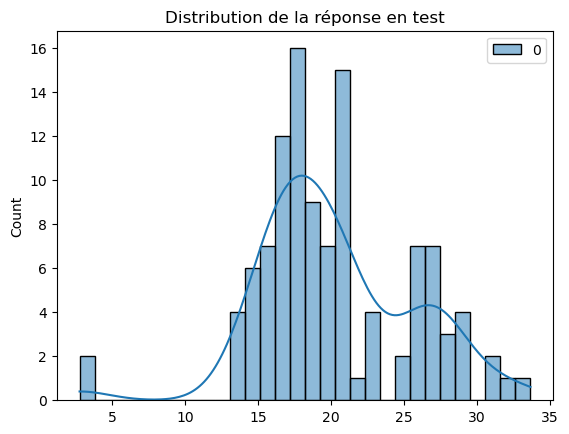

In [130]:
sns.histplot(ytest, bins=30, kde=True)
plt.title("Distribution de la réponse en test")

In [131]:
# Concaténation des deux
y = pd.concat([pd.Series(ytrain.flatten()), pd.Series(ytest.flatten())], ignore_index=True)
#X = pd.concat([pd.DataFrame(Xtrain),pd.DataFrame(Xtest)], ignore_index=True)
y = y.values


## conclusion de la repartition

On a une repartition similaire de la reponse entre le jeu d'entrainement et le jeu de test
Cependant on peut supposer que concentration comprise entre 0 et 5 sont éloignés et peuvent être considéré comme des outliers

# identification des outliers en se basant sur les spectres

## Réalisons l'ACP pour reduire la dimension et supprimer les outliers


In [158]:
pca_snv = make_pipeline(MinMaxScaler(),PCA(20))
score=pca_snv.fit_transform(X)
pca = pca_snv.named_steps["pca"]

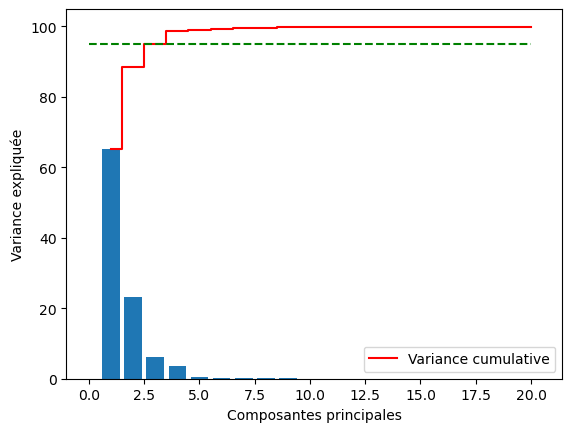

In [133]:
# visualisation de la variance expliquée par les composantes principales
plot_pca_variance(pca)

In [134]:
labels = np.arange(X.shape[0])
index = np.arange(y.shape[0])
mask_train = index < ytrain.shape[0]  # Vrai pour les indices correspondant à y_train
mask_test = ~mask_train                # Inverse du masque d'entraînement
# Ajout des catégories dans la base
y = pd.DataFrame({'values': y, 'category': np.where(mask_train, 'train', 'test')})

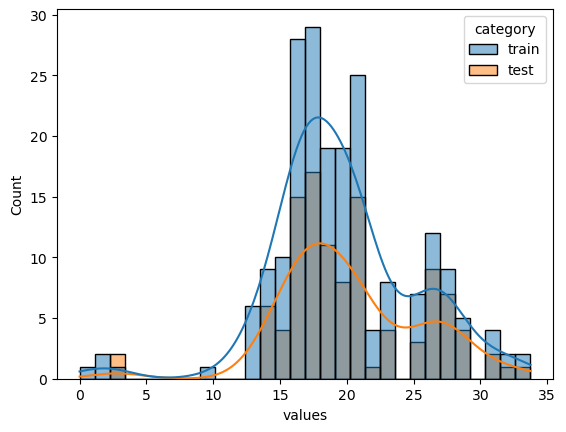

In [135]:
sns.histplot(y, x='values', hue='category', bins=30, kde=True)
categories = y['category']

In [136]:
len(labels)

372

In [137]:
len(score)

372

In [159]:
plot_pca_score(score,labels=labels,x=0,y=1)

In [146]:
plot_pca_score(score,labels=labels,x=0,y=2)